In [ ]:
# Install libraries
!pip install tifffile numpy matplotlib Pillow ipywidgets imageio

import tifffile as tiff
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import ipywidgets as widgets
from IPython.display import display
import os
import random
import imageio

In [2]:
# Main function to process the TIFF file
def process_tiff(file_path, resize_dim, use_composite, use_channel_1, use_channel_2, save_as_video):
    img = tiff.imread(file_path)   # Read the TIFF file

    # Ensure the 'frames' directory exists
    os.makedirs('frames', exist_ok=True)

    frame_paths = []  # Store paths of frames for video creation

    for t in range(img.shape[0]):
        composite_image = None

        for c in range(img.shape[2]):
            if (c == 0 and not use_channel_1) or (c == 1 and not use_channel_2):
                continue

            projection = np.max(img[t, :, c, :, :], axis=0)
            projection = (projection / np.max(projection) * 255).astype(np.uint8)

            if composite_image is None or not use_composite:
                composite_image = Image.fromarray(projection)
            else:
                composite_image = Image.blend(composite_image, Image.fromarray(projection), 0.5)

        if composite_image is not None:
            composite_image = composite_image.resize(resize_dim)
            frame_path = f'frames/frame_{t}.png'
            composite_image.save(frame_path)
            frame_paths.append(frame_path)

    if save_as_video and frame_paths:
        print("Creating video...")
        with imageio.get_writer('/content/video.mp4', fps=5) as video:
            for frame_path in frame_paths:
                video.append_data(imageio.imread(frame_path))
        print("Video created.")

# Interactive interface
file_path_widget = widgets.Text(description='File Path:')
resize_width_widget = widgets.IntText(value=512, description='Width:')
resize_height_widget = widgets.IntText(value=512, description='Height:')
composite_check_widget = widgets.Checkbox(value=True, description='Use Composite Image')
channel_1_check_widget = widgets.Checkbox(value=True, description='Use Channel 1')
channel_2_check_widget = widgets.Checkbox(value=True, description='Use Channel 2')
video_check_widget = widgets.Checkbox(value=False, description='Save as Video')
button = widgets.Button(description='Process')

# Button click event
def on_button_clicked(b):
    process_tiff(file_path_widget.value,
                 (resize_width_widget.value, resize_height_widget.value),
                 composite_check_widget.value,
                 channel_1_check_widget.value,
                 channel_2_check_widget.value,
                 video_check_widget.value)

button.on_click(on_button_clicked)

# Display widgets
display(file_path_widget, resize_width_widget, resize_height_widget,
        composite_check_widget, channel_1_check_widget, channel_2_check_widget, video_check_widget, button)


Text(value='', description='File Path:')

IntText(value=512, description='Width:')

IntText(value=512, description='Height:')

Checkbox(value=True, description='Use Composite Image')

Checkbox(value=True, description='Use Channel 1')

Checkbox(value=True, description='Use Channel 2')

Checkbox(value=False, description='Save as Video')

Button(description='Process', style=ButtonStyle())

Creating video...


<ipython-input-2-6533b2604422>:35: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  video.append_data(imageio.imread(frame_path))


Video created.
Creating video...


<ipython-input-2-6533b2604422>:35: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  video.append_data(imageio.imread(frame_path))


Video created.
Creating video...


<ipython-input-2-6533b2604422>:35: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  video.append_data(imageio.imread(frame_path))


Video created.
Creating video...


<ipython-input-2-6533b2604422>:35: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  video.append_data(imageio.imread(frame_path))


Video created.


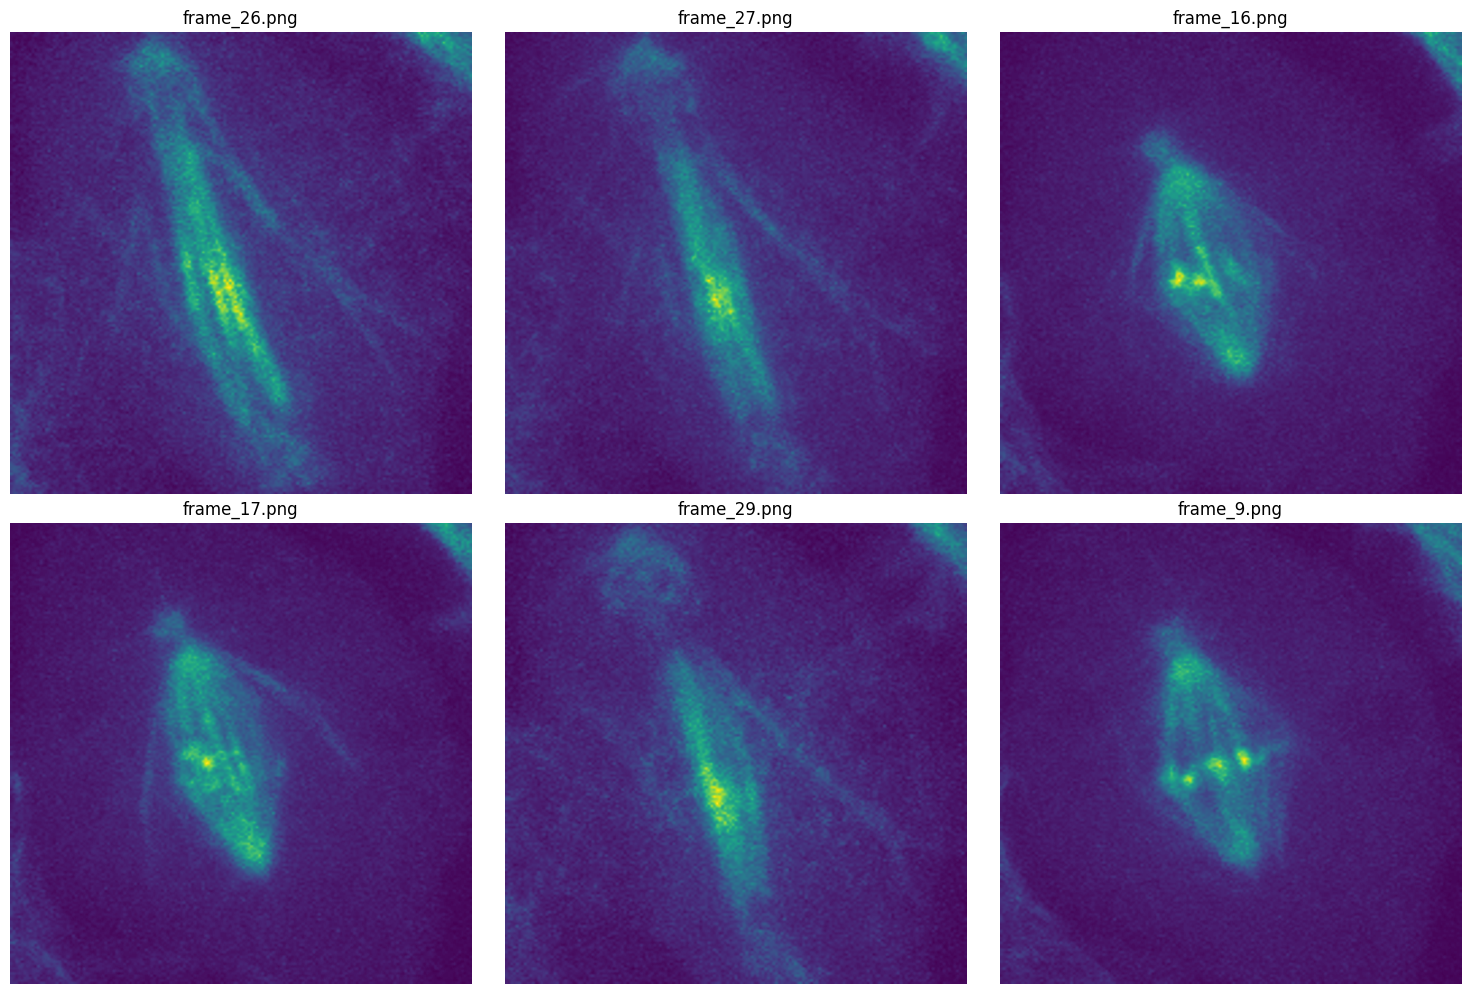

In [3]:
# Path to the 'frame' folder
folder_path = '/content/frames'

# List all files in the folder
file_list = os.listdir(folder_path)

# Randomly select 6 images
selected_images = random.sample(file_list, 6)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Display each image
for ax, image in zip(axes, selected_images):
    img_path = os.path.join(folder_path, image)
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(image)

plt.tight_layout()
plt.show()
